# Data Clean
### Takes data labels it, and breaks it into one second chunks
#### David Saffo
#### 5/16/2017

In [1]:
import pandas as pd
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
s = 10000000

In [2]:
giaWalking = pd.read_csv("Gia Walking.csv", header = None, skiprows = 2)
giaRunning = pd.read_csv("Gia Running.csv", header = None, skiprows = 2)
giaSitting = pd.read_csv("Gia Sitting.csv", header = None, skiprows = 2)
giaSleeping = pd.read_csv("Gia Sleeping.csv", header = None, skiprows = 2)
giaStanding = pd.read_csv("Gia Standing.csv", header = None, skiprows = 2)
giaClimbing = pd.read_csv("Gia Climbing.csv", header = None, skiprows = 2)
ilonaWalking = pd.read_csv("Ilona Walking.csv", header = None, skiprows = 2)
ilonaRunning = pd.read_csv("Ilona Running.csv", header = None, skiprows = 2)
ilonaSitting = pd.read_csv("Ilona Sitting.csv", header = None, skiprows = 2)
ilonaSleeping = pd.read_csv("Ilona Sleeping.csv", header = None, skiprows = 2)
ilonaStanding = pd.read_csv("Ilona Standing.csv", header = None, skiprows = 2)
ilonaClimbing = pd.read_csv("Ilona Climbing.csv", header = None, skiprows = 2)
liliWalking = pd.read_csv("Lili Walking.csv", header = None, skiprows = 2)
liliRunning = pd.read_csv("Lili Running.csv", header = None, skiprows = 2)
liliSitting = pd.read_csv("Lili Sitting.csv", header = None, skiprows = 2)
liliSleeping = pd.read_csv("Lili Sleeping.csv", header = None, skiprows = 2)
liliStanding = pd.read_csv("Lili Standing.csv", header = None, skiprows = 2)
liliClimbing = pd.read_csv("Lili Climbing.csv", header = None, skiprows = 2)

In [3]:
chrisWalking = pd.read_csv("Chris Walking.csv", header = None, skiprows = 2)
chrisRunning = pd.read_csv("Chris Running.csv", header = None, skiprows = 2)
chrisSitting = pd.read_csv("Chris Sitting.csv", header = None, skiprows = 2)
chrisSleeping = pd.read_csv("Chris Sleeping.csv", header = None, skiprows = 2)
chrisStanding = pd.read_csv("Chris Standing.csv", header = None, skiprows = 2)
chrisClimbing = pd.read_csv("Chris Climbing.csv", header = None, skiprows = 2)
davidWalking = pd.read_csv("David Walking.csv", header = None, skiprows = 2)
davidRunning = pd.read_csv("David Running.csv", header = None, skiprows = 2)
davidSitting = pd.read_csv("David Sitting.csv", header = None, skiprows = 2)
davidSleeping = pd.read_csv("David Sleeping.csv", header = None, skiprows = 2)
davidStanding = pd.read_csv("David Standing.csv", header = None, skiprows = 2)
davidClimbing = pd.read_csv("David Climbing.csv", header = None, skiprows = 2)

In [4]:
def createDF(sub, act, data):
    data = data.drop(4,1)
    x = 0
    i = 0
    array = []
    d = []
    for index, row in data.iterrows():
        if (data.iloc[index,0] %2 != 0):
            array.append([data.iloc[index,1],data.iloc[index,2],data.iloc[index,3]])
        elif (data.iloc[index,0] % 2 == 0):
            d.append([sub , act, array])
            array = []
            i+=1

    d.pop(0)
    d.pop(-1)
    d.pop(-2)

    dftest = pd.DataFrame(d)
    
    return dftest

In [5]:
df = createDF("gia", "walking", giaWalking)
df = df.append(createDF("gia", "running", giaRunning), ignore_index=True)
df = df.append(createDF("gia", "sleeping", giaSleeping), ignore_index=True)
df = df.append(createDF("gia", "climbing", giaClimbing), ignore_index=True)
df = df.append(createDF("gia", "sitting", giaSitting), ignore_index=True)
df = df.append(createDF("gia", "standing", giaStanding), ignore_index=True)

df = df.append(createDF("ilona", "walking", ilonaWalking), ignore_index=True)
df = df.append(createDF("ilona", "running", ilonaRunning), ignore_index=True)
df = df.append(createDF("ilona", "sleeping", ilonaSleeping), ignore_index=True)
df = df.append(createDF("ilona", "climbing", ilonaClimbing), ignore_index=True)
df = df.append(createDF("ilona", "sitting", ilonaSitting), ignore_index=True)
df = df.append(createDF("ilona", "standing", ilonaStanding), ignore_index=True)

df = df.append(createDF("lili", "walking", liliWalking), ignore_index=True)
df = df.append(createDF("lili", "running", liliRunning), ignore_index=True)
df = df.append(createDF("lili", "sleeping", liliSleeping), ignore_index=True)
df = df.append(createDF("lili", "climbing", liliClimbing), ignore_index=True)
df = df.append(createDF("lili", "sitting", liliSitting), ignore_index=True)
df = df.append(createDF("lili", "standing", liliStanding), ignore_index=True)
               
df = df.append(createDF("chris", "walking", chrisWalking), ignore_index=True)
df = df.append(createDF("chris", "running", chrisRunning), ignore_index=True)
df = df.append(createDF("chris", "sleeping", chrisSleeping), ignore_index=True)
df = df.append(createDF("chris", "climbing", chrisClimbing), ignore_index=True)
df = df.append(createDF("chris", "sitting", chrisSitting), ignore_index=True)
df = df.append(createDF("chris", "standing", chrisStanding), ignore_index=True)

df = df.append(createDF("david", "walking", davidWalking), ignore_index=True)
df = df.append(createDF("david", "running", davidRunning), ignore_index=True)
df = df.append(createDF("david", "sleeping", davidSleeping), ignore_index=True)
df = df.append(createDF("david", "climbing", davidClimbing), ignore_index=True)
df = df.append(createDF("david", "sitting", davidSitting), ignore_index=True)
df = df.append(createDF("david", "standing", davidStanding), ignore_index=True)

In [6]:
temp = []
a = []
mag = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    mag = []
    for j in range(len(temp)):
        x = temp[j][0]
        y = temp[j][1]
        z = temp[j][2]
    
        magnitude = math.sqrt(x ** 2 + y ** 2 + z ** 2)
        
        mag.append(magnitude)
       
    a.append(mag)

df.insert(3, "magnitude", a)

In [7]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Max = max(temp)
       
    a.append(Max)

df.insert(4, "max", a)

In [8]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Min = min(temp)
       
    a.append(Min)

df.insert(5, "min", a)

In [9]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    std = np.std(x)
    a.append(std)

df.insert(6, "std", a)

In [10]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    skew = stats.skew(temp)
    a.append(skew)

df.insert(7, "skew", a)

In [11]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    kurt = stats.kurtosis(temp)
    a.append(kurt)

df.insert(8, "kurtosis", a)

In [12]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Mean = np.mean(x)
    a.append(Mean)

df.insert(9, "mean", a)

In [13]:
temp = []
a = []

for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Median = np.median(x)
    a.append(Median)

df.insert(10, "median", a)

In [14]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(max(tempx))
    y.append(max(tempy))
    z.append(max(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(11, "x max", x)
df.insert(12, "y max", y)
df.insert(13, "z max", z)

In [15]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(min(tempx))
    y.append(min(tempy))
    z.append(min(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(14, "x min", x)
df.insert(15, "y min", y)
df.insert(16, "z min", z)

In [16]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    meanx = np.array(tempx)
    meany = np.array(tempy)
    meanz = np.array(tempz)
    x.append(np.mean(meanx))
    y.append(np.mean(meany))
    z.append(np.mean(meanz))
    tempx = []
    tempy = []
    tempz = []

df.insert(17, "x mean", x)
df.insert(18, "y mean", y)
df.insert(19, "z mean", z)

In [17]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    medianx = np.array(tempx)
    mediany = np.array(tempy)
    medianz = np.array(tempz)
    x.append(np.median(medianx))
    y.append(np.median(mediany))
    z.append(np.median(medianz))
    tempx = []
    tempy = []
    tempz = []

df.insert(20, "x median", x)
df.insert(21, "y median", y)
df.insert(22, "z median", z)

In [18]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(stats.skew(tempx))
    y.append(stats.skew(tempy))
    z.append(stats.skew(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(23, "x skew", x)
df.insert(24, "y skew", y)
df.insert(25, "z skew", z)

In [19]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(stats.kurtosis(tempx))
    y.append(stats.kurtosis(tempy))
    z.append(stats.kurtosis(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(26, "x kurtosis", x)
df.insert(27, "y kurtosis", y)
df.insert(28, "z kurtosis", z)

In [20]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    
    stdx = np.array(tempx)
    stdy = np.array(tempy)
    stdz = np.array(tempz)
    x.append(np.std(stdx))
    y.append(np.std(stdy))
    z.append(np.std(stdz))
    tempx = []
    tempy = []
    tempz = []

df.insert(29, "x std", x)
df.insert(30, "y std", y)
df.insert(31, "z std", z)

In [21]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis,mean,...,z median,x skew,y skew,z skew,x kurtosis,y kurtosis,z kurtosis,x std,y std,z std
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712,10.103423,...,-1.6,-0.281683,-0.115287,-0.958296,4.834692,4.085765,1.460693,1.204284,1.099321,0.682528
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980,10.294204,...,-1.9,-1.143094,0.076080,-0.456637,1.420196,1.369993,-0.315002,2.404669,2.229920,1.796619
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430,10.325923,...,-1.9,-1.169397,0.660472,-1.361813,1.634786,0.683003,2.046856,2.649007,2.882193,2.197824
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015,10.695082,...,-2.2,-1.385162,-0.753958,-0.832902,2.479632,1.038908,0.454232,2.830061,2.743193,2.133902
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679,10.447635,...,-2.0,-1.572159,-0.717104,-0.821070,3.959701,1.671694,0.469151,2.539729,2.612113,1.971313


In [22]:
Y = df[1]
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'kurtosis', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std']
X = df[features]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

[0.84615384615384615, 1]


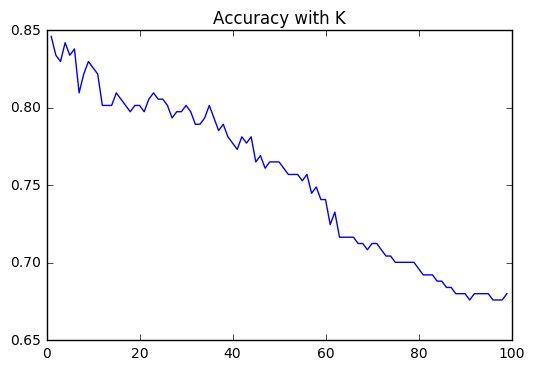

In [24]:
kResult= []
for n in range(1, 100,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    kResult.append([acc,n])
print(max(kResult))
#plotting peak k value preformance 
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.acc, kResult.n)
plt.title("Accuracy with K")
plt.show()

In [30]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
expected = y_test
predicted = model.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(expected, predicted))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)



Classification Report:
             precision    recall  f1-score   support

   climbing       0.53      0.53      0.53        15
    running       0.96      0.88      0.91        49
    sitting       0.84      0.71      0.77        45
   sleeping       0.98      0.93      0.95        54
   standing       0.74      0.88      0.80        42
    walking       0.81      0.93      0.87        42

avg / total       0.85      0.85      0.85       247



Confusion matrix


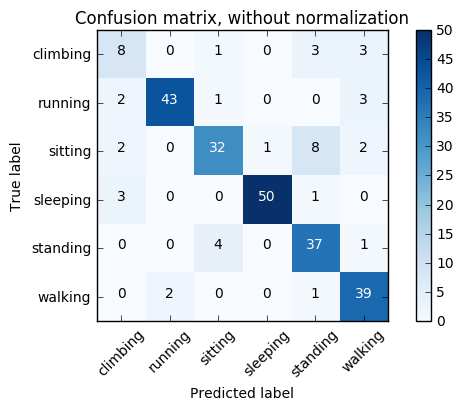

In [31]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()